### [ 산점도 그래프 ]
- 2개의 컬럼(변수)의 관계를 시각화해서 표현
- 연속형(수치형) 데이터에 사용함.


In [50]:
# [1] 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [51]:
# [2] 데이터 준비
F_DATA=r'C:\Users\zizonkjs\pandas\datafolder\auto_mpg.csv'
df=pd.read_csv(F_DATA)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [52]:
# 3. 컬럼별 타입 확인
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [53]:
# 4. 컬럼별로 이상한 값 즉, 이상치 체크 시각화
df['weight']
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


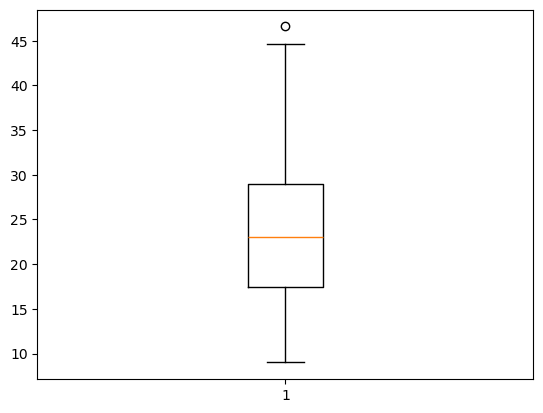

In [54]:
# - 박스 그래프로 이상치 시각화
retDict=plt.boxplot(df['mpg'])
plt.show()

In [55]:
# 박스 그래프에서 받은 결과 확인
for k,v in retDict.items():
    print(k,v)
    for _ in v:
        print(_.get_data())

whiskers [<matplotlib.lines.Line2D object at 0x000001CF5E8E78B0>, <matplotlib.lines.Line2D object at 0x000001CF5E8E7B50>]
(array([1, 1]), array([17.5,  9. ]))
(array([1, 1]), array([29. , 44.6]))
caps [<matplotlib.lines.Line2D object at 0x000001CF5E8E7DF0>, <matplotlib.lines.Line2D object at 0x000001CF5E8F60D0>]
(array([0.9625, 1.0375]), array([9., 9.]))
(array([0.9625, 1.0375]), array([44.6, 44.6]))
boxes [<matplotlib.lines.Line2D object at 0x000001CF5E8E7610>]
(array([0.925, 1.075, 1.075, 0.925, 0.925]), array([17.5, 17.5, 29. , 29. , 17.5]))
medians [<matplotlib.lines.Line2D object at 0x000001CF5E8F6370>]
(array([0.925, 1.075]), array([23., 23.]))
fliers [<matplotlib.lines.Line2D object at 0x000001CF5E8F6610>]
(array([1.]), array([46.6]))
means []


In [56]:
outliers=retDict['caps']
low_outlier=outliers[0].get_data()[1].tolist()[0]
low_outlier

9.0

In [57]:
up_outlier=outliers[1].get_data()[1].tolist()[0]
up_outlier

44.6

In [58]:
# 이상치 처리
df[df['mpg']<low_outlier], df[df['mpg']>up_outlier]

(Empty DataFrame
 Columns: [mpg, cylinders, displacement, horsepower, weight, acceleration, model year, origin, car name]
 Index: [],
       mpg  cylinders  displacement horsepower  weight  acceleration  \
 322  46.6          4          86.0         65    2110          17.9   
 
      model year  origin   car name  
 322          80       3  mazda glc  )